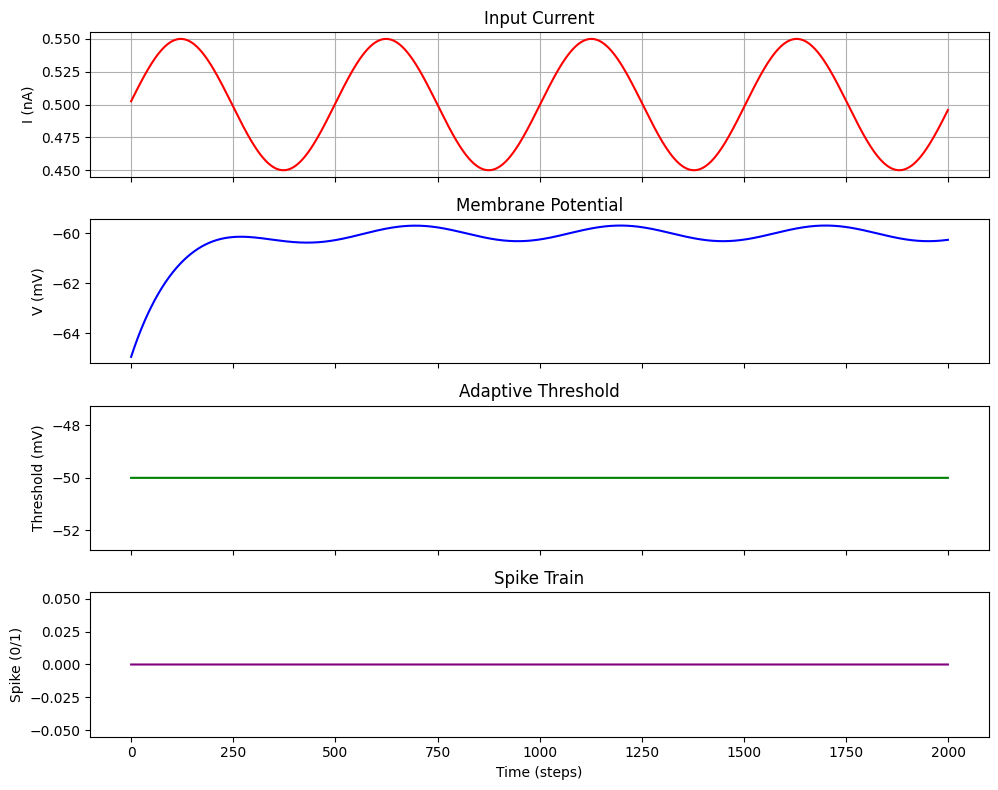

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
dt = 0.1               # Time step (ms)
T = 200                # Total simulation time (ms)
n_samples = int(T / dt)
time = np.arange(0, T, dt)

V_rest = -65.0         # Resting potential (mV)
V_th = -50.0           # Initial threshold (mV)
R_m = 10.0             # Membrane resistance (MΩ)
tau_m = 10.0           # Membrane time constant (ms)
tau_th = 50.0          # Threshold adaptation time constant (ms)
V_spike = 30.0         # Spike potential (mV)
adaptation_step = 2.0  # Threshold increase after a spike (mV)

# Sinusoidal Input Current
n_in = 1  # Number of input current patterns (1 neuron in this case)
x = np.linspace(0, 50, n_samples)  # Create points over one period
single_wave = 0.05 * np.sin((x + 0.1) / 2) + 0.5
input_currents = np.tile(single_wave, (n_in, 1)).T  # Transpose to match time dimension

# Variables
V = V_rest             # Membrane potential
V_threshold = V_th     # Spike threshold
adaptive_thresholds = []  # Threshold dynamics
spikes = np.zeros(n_samples)  # Spike train
voltages = []          # Membrane potential over time

# Simulation loop
for t_idx in range(n_samples):
    # Update membrane potential using the LIF equation
    dV = (-(V - V_rest) + R_m * input_currents[t_idx, 0]) * dt / tau_m
    V += dV

    # Check for a spike
    if V >= V_threshold:
        V = V_spike  # Emit spike
        spikes[t_idx] = 1
        V_threshold += adaptation_step  # Adapt threshold

    # Reset membrane potential after spike
    if V == V_spike:
        V = V_rest

    # Adapt threshold
    dV_threshold = -(V_threshold - V_th) * dt / tau_th
    V_threshold += dV_threshold

    # Store data for plotting
    voltages.append(V)
    adaptive_thresholds.append(V_threshold)

# Convert lists to numpy arrays for easier manipulation
voltages = np.array(voltages)
adaptive_thresholds = np.array(adaptive_thresholds)

# Plot using subplots
fig, axs = plt.subplots(4, 1, figsize=(10, 8), sharex=True)

# Input Current
axs[0].plot(range(n_samples), input_currents[:, 0], color='red')
axs[0].set_title("Input Current")
axs[0].set_ylabel("I (nA)")
axs[0].grid()

# Membrane Potential (Voltage)
axs[1].plot(range(n_samples), voltages, color='blue')
axs[1].set_title("Membrane Potential")
axs[1].set_ylabel("V (mV)")

# Adaptive Threshold
axs[2].plot(range(n_samples), adaptive_thresholds, color='green')
axs[2].set_title("Adaptive Threshold")
axs[2].set_ylabel("Threshold (mV)")

# Spikes
axs[3].plot(range(n_samples), spikes, color='purple')
axs[3].set_title("Spike Train")
axs[3].set_xlabel("Time (steps)")
axs[3].set_ylabel("Spike (0/1)")

plt.tight_layout()
plt.show()
